In [2]:
#Import Libaraies
from fastai.vision.all import *
import torch 
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Load Dataset. We will be testing the teacher and student models, first and foremost, on the Imagenet Dataset
#This is as one of the key criticisms of the original paper was that only CIFAR-100 was used to validate the given findings
#As actually training a model on the full ImageNet dataset would require more compute, processing pwoer, and time than currently available, use 
#FastAI's Imagenette and Imagewoof instead - combined into one, the Imagewang dataset.

#Use the 160 px version to save training time
Imagewang_path = untar_data(URLs.IMAGEWANG_160)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


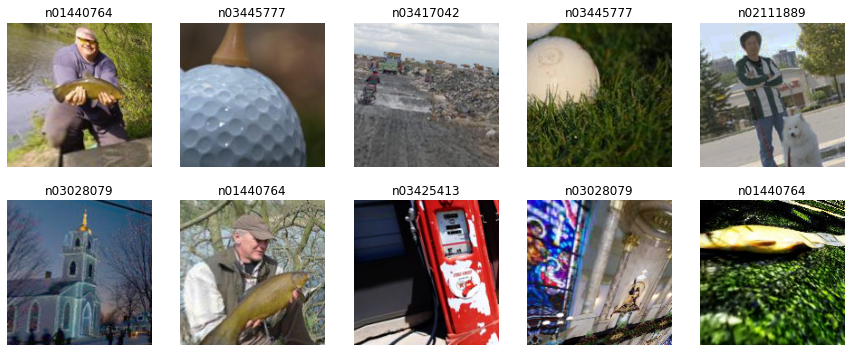

In [20]:
#Create Training Datablock for the teacher model
teacher_train_datablock = DataBlock(blocks = (ImageBlock, CategoryBlock),
                                       get_items = get_image_files,
                                       get_y = parent_label,
                                       splitter = RandomSplitter(valid_pct = 0.25, seed = 25),
                                       batch_tfms = aug_transforms(mult = 2.),
                                       item_tfms = Resize(160))
#Create a dataloader for the teacher model
batch_size = 64
teacher_train_dataloader = teacher_train_datablock.dataloaders(source = Imagewang_path/"train", batch_size = batch_size, shuffle = True)
#Print sample batch of 10 samples
teacher_train_dataloader.train.show_batch(max_n = 10, nrows = 2)

In [ ]:
#Create a Learner Object for the teacher. This will, initially, be a DenseNet - the goal is to teach a ResNet with the same parameters and attain the same accuracy


In [ ]:
#Loss Function between teacher and student models -> known as the Distillation loss
def distillationLoss(student_pred_distribution, teacher_pred_distribution):
    #Define loss
    loss = torch.tensor([], dtype = torch.float64, requires_grad = True)
    #Iterate over all predictions - this loss implements the formula L(q, p) = sum(qlog(p)), where q the correct distribution and p is the given probability distribution
    #Simply accumulate the loss
    for s_pred, t_pred in zip(student_pred_distribution, teacher_pred_distribution):
        loss.add_(torch.mul(t_pred, torch.log(s_pred)))
    return loss



In [27]:
test = torch.tensor([[1, 2, 3], 
                     [4, 5, 6], 
                     [7, 8, 9]])

idxs = torch.randperm(test.nelement())
test = test.view(-1)[idxs].view(test.size())
print(test)

tensor([[6, 2, 7],
        [9, 3, 4],
        [8, 1, 5]])
